In [2]:
import numpy as np
import pandas as pd
from pandas import Series, DataFrame
import matplotlib.pyplot as plt
import seaborn as sns
from matplotlib import rcParams

Read CSV:

In [3]:
file_path = r"data\census\98-401-X2016066_English_CSV_data.csv"
df = pd.read_csv(file_path)
print(df.head())

   CENSUS_YEAR  GEO_CODE (POR)  GEO_LEVEL         GEO_NAME  GNR  GNR_LF  \
0         2016         3501005          1  South Glengarry  3.9     2.7   
1         2016         3501005          1  South Glengarry  3.9     2.7   
2         2016         3501005          1  South Glengarry  3.9     2.7   
3         2016         3501005          1  South Glengarry  3.9     2.7   
4         2016         3501005          1  South Glengarry  3.9     2.7   

   DATA_QUALITY_FLAG CSD_TYPE_NAME  ALT_GEO_CODE  \
0                  0            TP       3501005   
1                  0            TP       3501005   
2                  0            TP       3501005   
3                  0            TP       3501005   
4                  0            TP       3501005   

      DIM: Profile of Census Subdivisions (2247)  \
0                               Population, 2016   
1                               Population, 2011   
2     Population percentage change, 2011 to 2016   
3                        Tot

Step 3: Filter for Median Income:

In [4]:
df = df[
    df["DIM: Profile of Census Subdivisions (2247)"] 
    == "Median total income in 2015 among recipients ($)"
]
print(df.shape)

(575, 15)


Step 4: Filter columns:

In [6]:
df = df[["GEO_CODE (POR)", "Dim: Sex (3): Member ID: [1]: Total - Sex"]]
print(df.head())

      GEO_CODE (POR) Dim: Sex (3): Member ID: [1]: Total - Sex
662          3501005                                  36092.00
2909         3501007                                  13744.00
5156         3501011                                  36414.00
7403         3501012                                  26644.00
9650         3501020                                  32117.00


Step 5: Rename columns:

In [7]:
df = df.rename(columns={
    "GEO_CODE (POR)": "GEOCODE",
    "Dim: Sex (3): Member ID: [1]: Total - Sex": "Median Income"
})
print(df.head())

      GEOCODE Median Income
662   3501005      36092.00
2909  3501007      13744.00
5156  3501011      36414.00
7403  3501012      26644.00
9650  3501020      32117.00


Step 6: Set index:

In [8]:
df = df.set_index("GEOCODE")
print(df.head())

        Median Income
GEOCODE              
3501005      36092.00
3501007      13744.00
3501011      36414.00
3501012      26644.00
3501020      32117.00


Step 7: Filter invalid values:

In [9]:
invalid_values = ["x", "F", ".."]
df = df[~df["Median Income"].isin(invalid_values)]
print(df.shape)

(479, 1)


Step 8: Convert to numeric:

In [10]:
df["Median Income"] = pd.to_numeric(df["Median Income"], errors="coerce")
print(df.dtypes)
print(df.head())

Median Income    float64
dtype: object
         Median Income
GEOCODE               
3501005        36092.0
3501007        13744.0
3501011        36414.0
3501012        26644.0
3501020        32117.0


Step 9: DataFrame plot histogram:

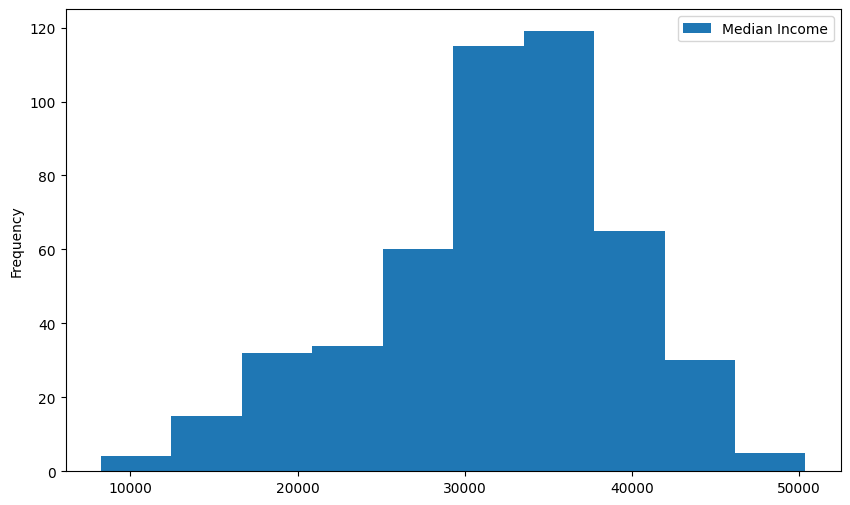

In [11]:
# Using DataFrame plot method
df.plot(kind='hist', figsize=(10, 6))
plt.show()

Step 10-12: Seaborn histogram and save:

Histogram saved to data/median_income_ON.png


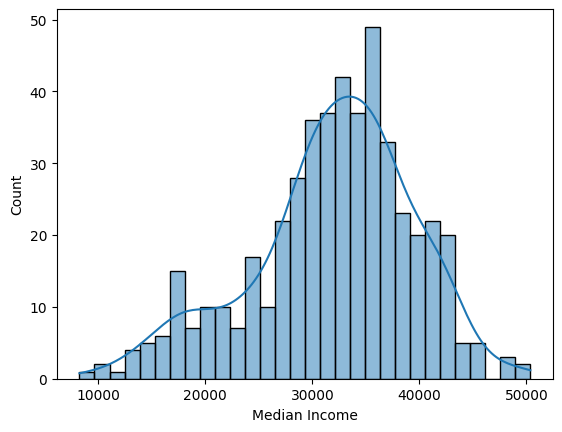

In [12]:
# Using seaborn histplot method
histo = sns.histplot(data=df, x="Median Income", bins=30, kde=True)

# Get figure from AxesSubplot
fig = histo.get_figure()

# Save figure to PNG file
fig.savefig("data/median_income_ON.png", dpi=300, bbox_inches='tight')
print("Histogram saved to data/median_income_ON.png")
plt.show()